# How it works:
- uses different rules to break bonds
- rules based on specific type of chemical reaction(hydrolysis, reduction, alkylation etc)
- Each rule assigns a symbol to the broken bond( [1*], [5*], [16*] etc) that is used to indicate what kind of atoms and bonds can be used to reconnect the fragments.

In [51]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import Recap,BRICS
import pathlib
import pandas as pd
from rdkit.Chem import PandasTools


def file_to_df(file):
  file_extension = pathlib.Path(file).suffix # file.name
  if file_extension == ".csv":
    df = pd.read_csv(file)
  elif file_extension == ".json":
    df = pd.read_json(file)
  elif file_extension in [".xls", ".xlsx"]:
    df = pd.read_excel(file)
  elif file_extension == ".sdf":
    df = PandasTools.LoadSDF(file, embedProps=True, molColName='Molecule', smilesName='smiles')
  else:
    print("File type not supported.")
  return df

In [52]:
lunghini_biodeg = "C:/Users/jadh8858/Desktop/scripts/Downloaded_Data/lunghini_biodeg.sdf"
environmental_persistance_df= "C:/Users/jadh8858/Desktop/scripts/Downloaded_Data/environmental_persistance_df.csv"

In [56]:
persistance_df = file_to_df(environmental_persistance_df)
persistance_df.head(3)

,Unnamed: 0,SMILES,nPvsP,set,medium,DB,Values-logDT50,Name,CASRN,ID,smiles,Molecule
0,0,BrC(Br)Br,1,train,sediment,Literature,NaN,Bromoform,75-25-2,NaN,BrC(Br)Br,<rdkit.Chem.rdchem.Mol object at 0x12ec19000>
1,1,C/C=C\C(=O)Oc1c(cc(cc1C(C)CCCCCC)[N+]([O-])=O)...,0,train,sediment,PPDB,NaN,NaN,NaN,NaN,C/C=C\C(=O)Oc1c(C(C)CCCCCC)cc([N+](=O)[O-])cc1...,<rdkit.Chem.rdchem.Mol object at 0x12ec19690>
2,2,C1C=CCC=C1,1,train,sediment,Literature,NaN,"1,4-Cyclohexadiene",628-41-1,NaN,C1=CCC=CC1,<rdkit.Chem.rdchem.Mol object at 0x12ec197e0>


In [4]:
cdk2mols = [x for x in Chem.SDMolSupplier(lunghini_biodeg) if x is not None]
for m in cdk2mols: AllChem.Compute2DCoords(m)

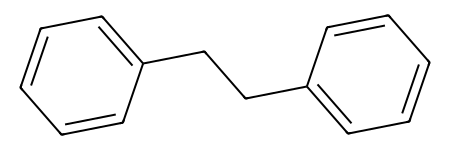

In [10]:
m1 = cdk2mols[34]
m1

In [11]:
pieces = BRICS.BRICSDecompose(m1)
pieces

{'[16*]c1ccccc1', '[8*]CC[8*]'}

In [12]:
allfrags=set()
for m in cdk2mols:
    pieces = BRICS.BRICSDecompose(m)
    allfrags.update(pieces)
allfrags
     

{'Nc1ccc(/N=N/c2ccccc2)cc1',
 'BrCCBr',
 '[16*]c1ccc(/N=N/c2ccc(N)cc2N)cc1',
 '[8*]C(N)C(=O)O',
 'CC1C(C)(C)C2=C(C(=O)CCC2)C1(C)C',
 '[12*]S(=O)(=O)c1ccc(/N=N/c2ccc(O)c([16*])c2)cc1',
 '[9*]n1cnc(C)c1',
 '[1*]C(=O)C[4*]',
 '[16*]c1ccccc1S(=O)(=O)N=C=O',
 '[6*]C(=O)CC',
 'O=C(O)CCCCCCCCCCCCCCCCC(=O)O',
 '[5*]N1CCC([15*])CC1',
 '[14*]c1cncs1',
 'C=CC(C)C#N',
 '[16*]c1ccc2ccccc2c1',
 '[7*]C(C)C',
 'CC(C)(CBr)C(O)(Br)Br',
 '[1*]C(=O)C([4*])C(C)C',
 'CCCCC#N',
 '[11*]SCS[11*]',
 '[4*]CCC#Cc1ccc([16*])cc1',
 '[16*]c1ccc(N)cc1S(=O)(=O)O',
 '[16*]c1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl',
 'Nc1ccc(S(N)(=O)=O)cc1',
 '[1*]C(=O)C([1*])=O',
 'CCCCCCCCCCCCCCCCCCCCCC(=O)O',
 'FC(Cl)Cl',
 '[6*]C(=O)CC([6*])=O',
 'Oc1ccc(Br)cc1Br',
 'CCCCCCCCCCCCO',
 '[16*]c1ccc([N+](=O)[O-])cc1Cl',
 'CCCCCC(=O)O',
 'C=CN1CCCC1=O',
 'CC(C)C1=CC2C(C)CC1C1C(=O)OC(=O)C21',
 'CN(C)C',
 '[4*]C(C)CO',
 '[16*]c1cc(Cl)c([16*])cc1N',
 '[16*]c1ccc(C)c([16*])c1',
 'O=c1[nH]c2ccccc2c(=O)o1',
 '[16*]c1cc2c(cc1O)[nH]c1ccccc12',
 '[1*]C(N)=O',
 '

In [13]:
len(allfrags)


2427

In [18]:
len(cdk2mols)


3192

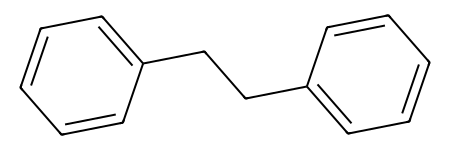

In [20]:
m = Chem.Mol(cdk2mols[34].ToBinary())
m
    

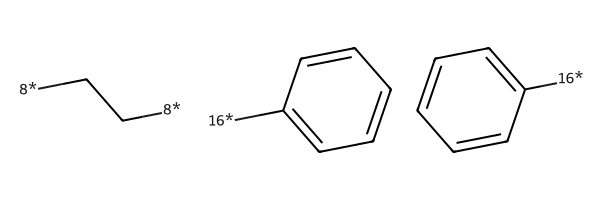

In [21]:
fragmented=BRICS.BreakBRICSBonds(m)
pieces=Chem.GetMolFrags(fragmented,asMols=True)
Draw.MolsToGridImage(pieces)

# Modulerization:

In [32]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import Recap,BRICS

# paths
lunghini_biodeg = "C:/Users/jadh8858/Desktop/scripts/Downloaded_Data/lunghini_biodeg.sdf"
environmental_persistance_df= "C:/Users/jadh8858/Desktop/scripts/Downloaded_Data/environmental_persistance_df.csv"

# convert lunghini biodeg to mol
cdk2mols = [x for x in Chem.SDMolSupplier(lunghini_biodeg) if x is not None]
# for m in cdk2mols: AllChem.Compute2DCoords(m)

# calc fragments for complete data
allfrags=set()
for m in cdk2mols:
    pieces = BRICS.BRICSDecompose(m)
    allfrags.update(pieces)

In [37]:
allfrags

{'Nc1ccc(/N=N/c2ccccc2)cc1',
 'BrCCBr',
 '[16*]c1ccc(/N=N/c2ccc(N)cc2N)cc1',
 '[8*]C(N)C(=O)O',
 'CC1C(C)(C)C2=C(C(=O)CCC2)C1(C)C',
 '[12*]S(=O)(=O)c1ccc(/N=N/c2ccc(O)c([16*])c2)cc1',
 '[9*]n1cnc(C)c1',
 '[1*]C(=O)C[4*]',
 '[16*]c1ccccc1S(=O)(=O)N=C=O',
 '[6*]C(=O)CC',
 'O=C(O)CCCCCCCCCCCCCCCCC(=O)O',
 '[5*]N1CCC([15*])CC1',
 '[14*]c1cncs1',
 'C=CC(C)C#N',
 '[16*]c1ccc2ccccc2c1',
 '[7*]C(C)C',
 'CC(C)(CBr)C(O)(Br)Br',
 '[1*]C(=O)C([4*])C(C)C',
 'CCCCC#N',
 '[11*]SCS[11*]',
 '[4*]CCC#Cc1ccc([16*])cc1',
 '[16*]c1ccc(N)cc1S(=O)(=O)O',
 '[16*]c1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl',
 'Nc1ccc(S(N)(=O)=O)cc1',
 '[1*]C(=O)C([1*])=O',
 'CCCCCCCCCCCCCCCCCCCCCC(=O)O',
 'FC(Cl)Cl',
 '[6*]C(=O)CC([6*])=O',
 'Oc1ccc(Br)cc1Br',
 'CCCCCCCCCCCCO',
 '[16*]c1ccc([N+](=O)[O-])cc1Cl',
 'CCCCCC(=O)O',
 'C=CN1CCCC1=O',
 'CC(C)C1=CC2C(C)CC1C1C(=O)OC(=O)C21',
 'CN(C)C',
 '[4*]C(C)CO',
 '[16*]c1cc(Cl)c([16*])cc1N',
 '[16*]c1ccc(C)c([16*])c1',
 'O=c1[nH]c2ccccc2c(=O)o1',
 '[16*]c1cc2c(cc1O)[nH]c1ccccc12',
 '[1*]C(N)=O',
 '

In [59]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import BRICS

# Load the dataframe
df =persistance_df

# Extract the column with SMILES
smiles_column = 'SMILES'
smiles = df[smiles_column]

# Take input from the user for the target column
target_column = "nPvsP" #input('Enter the name of the target column: ')

# Find out the number of categories in the target column
categories = df[target_column].nunique()

# Create a list to store the fragment analysis results
fragment_analysis = []

# Perform fragment analysis for each category
for category in df[target_column].unique():
    category_df = df[df[target_column] == category]
    category_smiles = category_df[smiles_column]

    # Create a dictionary to store the fragment analysis results for this category
    category_results = {
        'PROPERTY_VALUE': category,
        'FRAGMENTS': [],
        'FREQUENCY': []
    }

    # Calculate fragments for each molecule in the category
    all_frags = []
    for smiles_string in category_smiles:
        mol = Chem.MolFromSmiles(smiles_string)
        if mol is not None:
            fragments = BRICS.BRICSDecompose(mol)
            all_frags.extend(fragments)

    # Count the occurrence of each fragment
    fragment_counts = pd.Series(all_frags).value_counts().reset_index()
    fragment_counts.columns = ['FRAGMENTS', 'FREQUENCY']

    # Store the fragment analysis results for this category
    category_results['FRAGMENTS'] = fragment_counts['FRAGMENTS']
    category_results['FREQUENCY'] = fragment_counts['FREQUENCY']

    # Append the results to the overall fragment analysis list
    fragment_analysis.append(category_results)

# Generate a separate dataframe for fragment analysis results
fragments_df = pd.concat([pd.DataFrame(category_results) for category_results in fragment_analysis])

# Print the fragment analysis results dataframe
fragments_df


[12:20:33] Explicit valence for atom # 15 N, 4, is greater than permitted
[12:20:33] Explicit valence for atom # 20 N, 4, is greater than permitted
[12:20:34] Explicit valence for atom # 8 C, 5, is greater than permitted
[12:20:34] Explicit valence for atom # 8 C, 5, is greater than permitted
[12:20:34] Explicit valence for atom # 8 C, 5, is greater than permitted
[12:20:34] Explicit valence for atom # 8 C, 5, is greater than permitted


      PROPERTY_VALUE                    FRAGMENTS  FREQUENCY
0                  1                    [5*]N[5*]         76
1                  1                    [3*]O[3*]         71
2                  1                [1*]C([6*])=O         54
3                  1                [16*]c1ccccc1         52
4                  1                       [3*]OC         43
...              ...                          ...        ...
1182               0             [Zn]=P[Zn]P=[Zn]          1
1183               0                       BrCCBr          1
1184               0                          C#C          1
1185               0                        C#CCO          1
1186               0  [16*]c1ccnc2cc(Cl)cc(Cl)c12          1

[1679 rows x 3 columns]


In [60]:
fragments_df

,PROPERTY_VALUE,FRAGMENTS,FREQUENCY
0,1,[5*]N[5*],76
1,1,[3*]O[3*],71
2,1,[1*]C([6*])=O,54
3,1,[16*]c1ccccc1,52
4,1,[3*]OC,43
...,...,...,...
1182,0,[Zn]=P[Zn]P=[Zn],1
1183,0,BrCCBr,1
1184,0,C#C,1
1185,0,C#CCO,1


In [61]:

# Divide the fragments_df according to each category
divided_df = {}
for category_results in fragment_analysis:
    category = category_results['PROPERTY_VALUE']
    category_df = fragments_df[fragments_df['PROPERTY_VALUE'] == category]
    divided_df[category] = category_df.drop(columns=['PROPERTY_VALUE']).reset_index(drop=True)

# Print the fragment analysis results for each category
for category, category_df in divided_df.items():
    print(f"Category: {category}")
    print(category_df)

Category: 1
                         FRAGMENTS  FREQUENCY
0                        [5*]N[5*]         76
1                        [3*]O[3*]         71
2                    [1*]C([6*])=O         54
3                    [16*]c1ccccc1         52
4                           [3*]OC         43
..                             ...        ...
487                   [8*]C(C)(C)O          1
488               [16*]c1cnn(C)c1O          1
489        [14*]c1nc(Cl)c(Cl)cc1Cl          1
490  [13*]C1Oc2ccc([16*])cc2C1(C)C          1
491           [16*]c1ccc(C)c(Cl)c1          1

[492 rows x 2 columns]
Category: 0
                        FRAGMENTS  FREQUENCY
0                       [3*]O[3*]        420
1                       [5*]N[5*]        314
2                          [3*]OC        236
3                   [1*]C([6*])=O        204
4                          [4*]CC        195
...                           ...        ...
1182             [Zn]=P[Zn]P=[Zn]          1
1183                       BrCCBr       

In [63]:
divided_df[0]

,FRAGMENTS,FREQUENCY
0,[3*]O[3*],420
1,[5*]N[5*],314
2,[3*]OC,236
3,[1*]C([6*])=O,204
4,[4*]CC,195
...,...,...
1182,[Zn]=P[Zn]P=[Zn],1
1183,BrCCBr,1
1184,C#C,1
1185,C#CCO,1


In [64]:
divided_df[1]

,FRAGMENTS,FREQUENCY
0,[5*]N[5*],76
1,[3*]O[3*],71
2,[1*]C([6*])=O,54
3,[16*]c1ccccc1,52
4,[3*]OC,43
...,...,...
487,[8*]C(C)(C)O,1
488,[16*]c1cnn(C)c1O,1
489,[14*]c1nc(Cl)c(Cl)cc1Cl,1
490,[13*]C1Oc2ccc([16*])cc2C1(C)C,1


In [66]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import BRICS
from rdkit.Chem.Draw import MolsToGridImage

# Load the dataframe
df = persistance_df

# Extract the column with SMILES
smiles_column = 'SMILES'
smiles = df[smiles_column]

# Take input from the user for the target column
target_column = "nPvsP"  # input('Enter the name of the target column: ')

# Find out the number of categories in the target column
categories = df[target_column].nunique()

# Create a list to store the fragment analysis results
fragment_analysis = []

# Perform fragment analysis for each category
for category in df[target_column].unique():
    category_df = df[df[target_column] == category]
    category_smiles = category_df[smiles_column]

    # Create a dictionary to store the fragment analysis results for this category
    category_results = {
        'PROPERTY_VALUE': category,
        'FRAGMENTS': [],
        'FREQUENCY': []
    }

    # Calculate fragments for each molecule in the category
    all_frags = []
    for smiles_string in category_smiles:
        mol = Chem.MolFromSmiles(smiles_string)
        if mol is not None:
            fragments = BRICS.BRICSDecompose(mol)
            all_frags.extend(fragments)

    # Count the occurrence of each fragment
    fragment_counts = pd.Series(all_frags).value_counts().reset_index()
    fragment_counts.columns = ['FRAGMENTS', 'FREQUENCY']

    # Store the fragment analysis results for this category
    category_results['FRAGMENTS'] = fragment_counts['FRAGMENTS']
    category_results['FREQUENCY'] = fragment_counts['FREQUENCY']

    # Append the results to the overall fragment analysis list
    fragment_analysis.append(category_results)

# Generate a separate dataframe for fragment analysis results
fragments_df = pd.concat([pd.DataFrame(category_results) for category_results in fragment_analysis])

# Divide the fragments_df according to each category
divided_df = {}
for category_results in fragment_analysis:
    category = category_results['PROPERTY_VALUE']
    category_df = fragments_df[fragments_df['PROPERTY_VALUE'] == category]
    divided_df[category] = category_df.drop(columns=['PROPERTY_VALUE']).reset_index(drop=True)

# Draw the top 10 molecules for each category
for category, category_df in divided_df.items():
    print(f"Category: {category}")
    top_10_mols = []
    total_mols = len(df[df[target_column] == category])
    for i, row in category_df.head(10).iterrows():
        fragment = row['FRAGMENTS']
        frequency = row['FREQUENCY']
        percentage = (frequency / total_mols) * 100
        print(f"Fragment: {fragment}, Frequency: {frequency}, Percentage: {percentage:.2f}%")
        mol = Chem.MolFromSmiles(fragment)
        top_10_mols.append(mol)
    MolsToGridImage(top_10_mols, molsPerRow=5)


[12:28:49] Explicit valence for atom # 15 N, 4, is greater than permitted
[12:28:49] Explicit valence for atom # 20 N, 4, is greater than permitted
[12:28:50] Explicit valence for atom # 8 C, 5, is greater than permitted
[12:28:50] Explicit valence for atom # 8 C, 5, is greater than permitted
[12:28:50] Explicit valence for atom # 8 C, 5, is greater than permitted
[12:28:50] Explicit valence for atom # 8 C, 5, is greater than permitted


Category: 1
Fragment: [5*]N[5*], Frequency: 76, Percentage: 11.03%
Fragment: [3*]O[3*], Frequency: 71, Percentage: 10.30%
Fragment: [1*]C([6*])=O, Frequency: 54, Percentage: 7.84%
Fragment: [16*]c1ccccc1, Frequency: 52, Percentage: 7.55%
Fragment: [3*]OC, Frequency: 43, Percentage: 6.24%
Fragment: [16*]c1ccc(Cl)cc1, Frequency: 41, Percentage: 5.95%
Fragment: [1*]C([1*])=O, Frequency: 38, Percentage: 5.52%
Fragment: [8*]C(F)(F)F, Frequency: 36, Percentage: 5.22%
Fragment: [9*]n1cncn1, Frequency: 34, Percentage: 4.93%
Fragment: [4*]CC, Frequency: 26, Percentage: 3.77%
Category: 0
Fragment: [3*]O[3*], Frequency: 420, Percentage: 24.46%
Fragment: [5*]N[5*], Frequency: 314, Percentage: 18.29%
Fragment: [3*]OC, Frequency: 236, Percentage: 13.74%
Fragment: [1*]C([6*])=O, Frequency: 204, Percentage: 11.88%
Fragment: [4*]CC, Frequency: 195, Percentage: 11.36%
Fragment: [1*]C([1*])=O, Frequency: 187, Percentage: 10.89%
Fragment: [16*]c1ccccc1, Frequency: 182, Percentage: 10.60%
Fragment: [8*]C(F

In [100]:

# main
import pandas as pd
from rdkit import Chem
from rdkit.Chem import BRICS
from rdkit.Chem.Draw import MolsToGridImage

# Load the dataframe
df = persistance_df

# Extract the column with SMILES
smiles_column = 'SMILES'
smiles = df[smiles_column]

# Take input from the user for the target column
target_column = "nPvsP"  # input('Enter the name of the target column: ')

# Find out the number of categories in the target column
categories = df[target_column].nunique()

# Create a list to store the fragment analysis results
fragment_analysis = []

# Perform fragment analysis for each category
for category in df[target_column].unique():
    category_df = df[df[target_column] == category]
    category_smiles = category_df[smiles_column]

    # Create a dictionary to store the fragment analysis results for this category
    category_results = {
        'CATEGORY': category,
        'FRAGMENTS': [],
        'FREQUENCY': [],
        'PERCENTAGE': []
    }

    # Calculate fragments for each molecule in the category
    all_frags = []
    for smiles_string in category_smiles:
        mol = Chem.MolFromSmiles(smiles_string)
        if mol is not None:
            fragments = BRICS.BRICSDecompose(mol)
            all_frags.extend(fragments)

    # Count the occurrence of each fragment
    fragment_counts = pd.Series(all_frags).value_counts().reset_index()
    fragment_counts.columns = ['FRAGMENTS', 'FREQUENCY']

    # Calculate the percentage of each fragment with respect to the total number of molecules in the category
    total_mols = len(category_smiles)
    fragment_counts['PERCENTAGE'] = (fragment_counts['FREQUENCY'] / total_mols) * 100

    # Store the fragment analysis results for this category
    category_results['FRAGMENTS'] = fragment_counts['FRAGMENTS']
    category_results['FREQUENCY'] = fragment_counts['FREQUENCY']
    category_results['PERCENTAGE'] = fragment_counts['PERCENTAGE']

    # Append the results to the overall fragment analysis list
    fragment_analysis.append(category_results)

# Generate a separate dataframe for fragment analysis results
divided_df = pd.concat([pd.DataFrame(category_results) for category_results in fragment_analysis], ignore_index=True)

# Get unique categories
categories = divided_df['CATEGORY'].unique()

# Create a dictionary to store the separate DataFrames for each category
category_dfs = {}

# Create separate DataFrames based on categories
for category in categories:
    category_dfs[category] = divided_df[divided_df['CATEGORY'] == category]

# Print the DataFrames for each category
for category, category_df in category_dfs.items():
    print(f"DataFrame for Category {category}:")
    print(category_df)
    print()


[12:47:45] Explicit valence for atom # 15 N, 4, is greater than permitted
[12:47:45] Explicit valence for atom # 20 N, 4, is greater than permitted
[12:47:46] Explicit valence for atom # 8 C, 5, is greater than permitted
[12:47:46] Explicit valence for atom # 8 C, 5, is greater than permitted
[12:47:46] Explicit valence for atom # 8 C, 5, is greater than permitted
[12:47:46] Explicit valence for atom # 8 C, 5, is greater than permitted


DataFrame for Category 1:
     CATEGORY                      FRAGMENTS  FREQUENCY  PERCENTAGE
0           1                      [5*]N[5*]         76   11.030479
1           1                      [3*]O[3*]         71   10.304790
2           1                  [1*]C([6*])=O         54    7.837446
3           1                  [16*]c1ccccc1         52    7.547170
4           1                         [3*]OC         43    6.240929
..        ...                            ...        ...         ...
487         1                   [8*]C(C)(C)O          1    0.145138
488         1               [16*]c1cnn(C)c1O          1    0.145138
489         1        [14*]c1nc(Cl)c(Cl)cc1Cl          1    0.145138
490         1  [13*]C1Oc2ccc([16*])cc2C1(C)C          1    0.145138
491         1           [16*]c1ccc(C)c(Cl)c1          1    0.145138

[492 rows x 4 columns]

DataFrame for Category 0:
      CATEGORY                    FRAGMENTS  FREQUENCY  PERCENTAGE
492          0                    [3*]O[